In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [3]:
# Specify the path to your Excel file
file_path = r'C:\Users\hp\OneDrive - Saskatchewan Polytechnic\Desktop\Sask Poly\Semester 1.2\MidSem Report.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

data.head(5)

,YEAR,Farm Land( sq km),"employment in Agric, % of total employment",population,total Precipitation,Min temperature,Max temperature,average temperature,Fertlizer,patent application non res,...,barley.production,Flaxseed( dollars per metric tonne),flaxeseed.seed,flaxseed.production,Canola (including rapeseed)( dollars per metric tonne),seed requirement,canola.prodction,Lentils( dollars per metric tonne),lentils seed req,lentils production
0,2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,...,NaN,201.515000,NaN,NaN,233.605000,NaN,NaN,363.916667,NaN,NaN
1,2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,...,10845.6,265.327500,NaN,715.0,280.780833,NaN,5017.1,301.250000,NaN,NaN
2,2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,...,10845.6,342.855000,29.6,715.0,353.843333,27.9,5017.1,356.666667,NaN,NaN
3,2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,...,7467.7,336.719167,31.7,679.4,346.510000,34.1,4520.5,452.500000,NaN,NaN
4,2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,...,12164.2,377.854167,29.7,754.4,342.473333,37.6,6771.2,426.833333,NaN,NaN


$$ Data Cleaning  $$

Data cleaning is a crucial step in the data analysis process for several reasons:

Improves Data Quality: Cleaning ensures that the data is accurate, consistent, and reliable, which is essential for drawing valid conclusions.
Removes Noise: By identifying and correcting errors, duplicates, and outliers, data cleaning reduces noise in the dataset, allowing for clearer insights.
Enhances Model Performance: Clean data leads to better-performing models by minimizing biases and inaccuracies that can distort results.
Facilitates Accurate Analysis: High-quality data allows for meaningful analysis, ensuring that the findings are reflective of the true underlying patterns in the data.
Saves Time and Resources: Investing time in data cleaning upfront can save significant time and resources later by preventing issues during analysis and modeling stages.
Supports Decision-Making: Clean data provides a solid foundation for making informed decisions, as stakeholders rely on accurate data for strategic planning and policy formulation.

In summary, data cleaning is essential for ensuring data integrity, enhancing analytical outcomes, and supporting effective decision-making.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 32 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   YEAR                                                                           25 non-null     int64  
 1   Farm Land( sq km)                                                              22 non-null     float64
 2   employment in Agric, % of total employment                                     24 non-null     float64
 3   population                                                                     24 non-null     float64
 4   total Precipitation                                                            25 non-null     object 
 5   Min temperature                                                                25 non-null     float64
 6   Max temperature             

In [7]:
# Rename the columns
data.columns = [
    'Year', 'Farm_Area', 'Agric_Employment_Rate','Population', 'Precipitation', 
    'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons', 
    'Nonres_Pat_App', 'Res_Pat_App', 'Soil_Index', 
    'Veg_Greeness_Rate', 'Green_Ind', 'Wheat_Price', 
    'Wheat_Seed', 'Wheat_Prod', 'Oats_Price', 'Oats_Seed', 
    'Oats_Prod', 'Barley_Price', 'Barley_Seed', 'Barley_Prod', 
    'Flax_Price', 'Flax_Seed', 'Flax_Prod', 
    'Canola_Price', 'Canola_Seed', 'Canola_Prod', 
    'Lentils_Price', 'Lentils_Seed', 'Lentils_Prod'
]

# Display the first few rows of the updated dataset
data.head()

,Year,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
0,2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,...,NaN,201.515000,NaN,NaN,233.605000,NaN,NaN,363.916667,NaN,NaN
1,2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,...,10845.6,265.327500,NaN,715.0,280.780833,NaN,5017.1,301.250000,NaN,NaN
2,2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,...,10845.6,342.855000,29.6,715.0,353.843333,27.9,5017.1,356.666667,NaN,NaN
3,2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,...,7467.7,336.719167,31.7,679.4,346.510000,34.1,4520.5,452.500000,NaN,NaN
4,2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,...,12164.2,377.854167,29.7,754.4,342.473333,37.6,6771.2,426.833333,NaN,NaN


In [8]:
# Check if the column 'Soil_Index' exists and is empty
if 'Soil_Index' in data.columns and data['Soil_Index'].isnull().all():
    # Drop the empty column
    data = data.drop(columns=['Soil_Index'])

# Optionally, you can print the DataFrame to verify the column has been removed
data.head()

,Year,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
0,2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,...,NaN,201.515000,NaN,NaN,233.605000,NaN,NaN,363.916667,NaN,NaN
1,2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,...,10845.6,265.327500,NaN,715.0,280.780833,NaN,5017.1,301.250000,NaN,NaN
2,2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,...,10845.6,342.855000,29.6,715.0,353.843333,27.9,5017.1,356.666667,NaN,NaN
3,2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,...,7467.7,336.719167,31.7,679.4,346.510000,34.1,4520.5,452.500000,NaN,NaN
4,2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,...,12164.2,377.854167,29.7,754.4,342.473333,37.6,6771.2,426.833333,NaN,NaN


Fill the null values using the Multivariate Imputation by Chained Equations (MICE)

Multivariate Imputation by Chained Equations (MICE) is a sophisticated statistical technique used to handle missing data by leveraging the relationships among multiple variables. The method begins by making initial guesses for the missing values, often using simple imputation techniques like mean or median. It then iteratively refines these guesses by treating each variable with missing data as a dependent variable, predicting its values based on the other observed variables in the dataset. This predictive modeling is typically carried out using regression techniques or other suitable algorithms. After each iteration, the imputed values are updated, and the process continues until the estimates converge or a specified number of iterations is reached. By incorporating the dependencies among variables, MICE provides more accurate and plausible imputed values, enabling better data analysis and interpretation while preserving the inherent relationships in the dataset.

Advantages of MICE
Preserves Relationships: MICE takes into account the relationships between variables, leading to more plausible imputations.
Flexibility: It can handle different types of data (continuous, categorical) and allows for various models to be used for imputation.
Multiple Imputation: MICE can produce multiple imputed datasets, allowing for uncertainty in the imputation to be accounted for in analyses.

In [10]:
# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=0)

# Fit the imputer on the data and transform it
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check for any remaining NaN values
data.isnull().sum()

Year                     0
Farm_Area                0
Agric_Employment_Rate    0
Population               0
Precipitation            0
Min_Temp                 0
Max_Temp                 0
Ave_Temp                 0
Fertlizer_Cons           0
Nonres_Pat_App           0
Res_Pat_App              0
Veg_Greeness_Rate        0
Green_Ind                0
Wheat_Price              0
Wheat_Seed               0
Wheat_Prod               0
Oats_Price               0
Oats_Seed                0
Oats_Prod                0
Barley_Price             0
Barley_Seed              0
Barley_Prod              0
Flax_Price               0
Flax_Seed                0
Flax_Prod                0
Canola_Price             0
Canola_Seed              0
Canola_Prod              0
Lentils_Price            0
Lentils_Seed             0
Lentils_Prod             0
dtype: int64

In [11]:
# Check for duplicates
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')

# Optionally, to see the duplicate rows themselves:
duplicate_rows = data[duplicates]
print('Duplicate rows:')
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Year, Farm_Area, Agric_Employment_Rate, Population, Precipitation, Min_Temp, Max_Temp, Ave_Temp, Fertlizer_Cons, Nonres_Pat_App, Res_Pat_App, Veg_Greeness_Rate, Green_Ind, Wheat_Price, Wheat_Seed, Wheat_Prod, Oats_Price, Oats_Seed, Oats_Prod, Barley_Price, Barley_Seed, Barley_Prod, Flax_Price, Flax_Seed, Flax_Prod, Canola_Price, Canola_Seed, Canola_Prod, Lentils_Price, Lentils_Seed, Lentils_Prod]
Index: []

[0 rows x 31 columns]


In [12]:
data['Year'] = data['Year'].astype(int)

# Now set 'Year' as the index
data.set_index('Year', inplace=True)

# Display the updated DataFrame
print("\nUpdated DataFrame with 'Year' as index:")
data.head(5)


Updated DataFrame with 'Year' as index:


,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,Res_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
Year,,,,,,,,,,,,,,,,,,,,,
2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,4187.0,...,10364.729096,201.515000,31.038438,813.49607,233.605000,36.698483,5917.291739,363.916667,44.391345,580.177192
2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,3963.0,...,10845.600000,265.327500,31.241273,715.00000,280.780833,34.798516,5017.100000,301.250000,44.435824,533.463402
2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,3959.0,...,10845.600000,342.855000,29.600000,715.00000,353.843333,27.900000,5017.100000,356.666667,52.581900,613.145093
2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,3929.0,...,7467.700000,336.719167,31.700000,679.40000,346.510000,34.100000,4520.500000,452.500000,66.191259,625.478338
2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,5231.0,...,12164.200000,377.854167,29.700000,754.40000,342.473333,37.600000,6771.200000,426.833333,63.503027,858.966085


In the next line of code, I perform a corelation test on the dataset to understand the relationships between different variables, especially focusing on specific output columns related to crop production.
In summary, correlation testing is a foundational step in exploratory data analysis that informs subsequent modeling decisions, enhances understanding of the data and ensures the robustness of analytical approaches.

In [14]:
# List of output columns
output_columns = ['Wheat_Prod', 'Oats_Prod', 'Barley_Prod', 'Flax_Prod', 'Canola_Prod', 'Lentils_Prod']

# Calculate the correlation matrix for all variables
correlation_matrix = data.corr()

# Extract correlations with respect to the output columns
output_correlations = correlation_matrix[output_columns]

output_correlations

,Wheat_Prod,Oats_Prod,Barley_Prod,Flax_Prod,Canola_Prod,Lentils_Prod
Farm_Area,-0.724676,-0.336250,0.488043,0.470669,-0.868557,-0.784036
Agric_Employment_Rate,-0.726082,-0.313725,0.417787,0.582673,-0.836082,-0.759751
Population,0.756634,0.409690,-0.419043,-0.512027,0.899510,0.832905
Precipitation,-0.125213,-0.143961,0.290897,0.304718,-0.217164,-0.258505
Min_Temp,-0.096339,-0.070195,-0.123941,0.290861,-0.092629,-0.012070
Max_Temp,-0.055942,0.240537,-0.190393,-0.165112,0.013052,0.027602
Ave_Temp,0.048588,-0.093505,-0.112499,0.123744,0.073453,0.227992
Fertlizer_Cons,0.762507,0.367283,-0.471809,-0.581088,0.876212,0.823335
Nonres_Pat_App,-0.557821,-0.051332,0.541842,0.490941,-0.703458,-0.700163
Res_Pat_App,-0.062584,0.276048,0.504494,0.137090,-0.186831,-0.258510


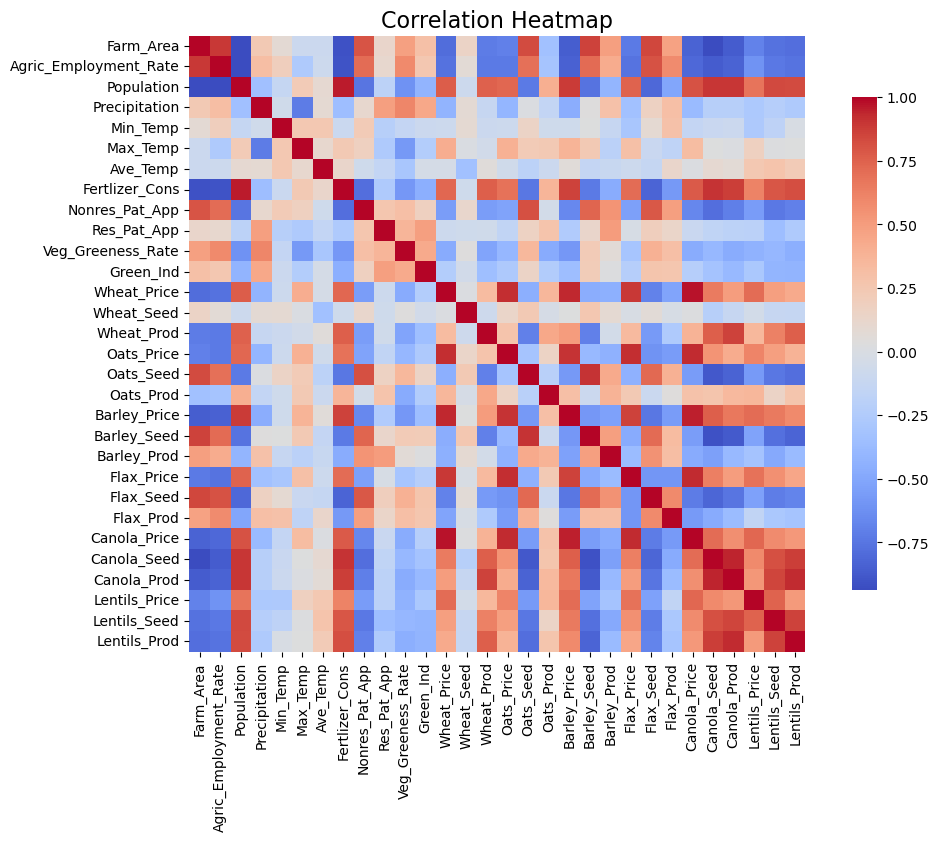

In [15]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [16]:
data.head()

,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,Res_Pat_App,...,Barley_Prod,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod
Year,,,,,,,,,,,,,,,,,,,,,
2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,4187.0,...,10364.729096,201.515000,31.038438,813.49607,233.605000,36.698483,5917.291739,363.916667,44.391345,580.177192
2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,3963.0,...,10845.600000,265.327500,31.241273,715.00000,280.780833,34.798516,5017.100000,301.250000,44.435824,533.463402
2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,3959.0,...,10845.600000,342.855000,29.600000,715.00000,353.843333,27.900000,5017.100000,356.666667,52.581900,613.145093
2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,3929.0,...,7467.700000,336.719167,31.700000,679.40000,346.510000,34.100000,4520.500000,452.500000,66.191259,625.478338
2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,5231.0,...,12164.200000,377.854167,29.700000,754.40000,342.473333,37.600000,6771.200000,426.833333,63.503027,858.966085


$$ Eploratory Data Analysis $$

Now that we have dealt with missing values and checked the relevance of our data, we move on to EDA.

In my project, which focuses on agricultural production and various influencing factors, Exploratory Data Analysis (EDA) is particularly important for several reasons, including but not limited to
Understanding Data Structure: EDA allows me to explore the dataset containing variables such as crop yields, weather conditions, and agricultural practices (e.g., Fertilizer_Cons). By examining the types of data and their distributions, I can better understand how these factors interact and influence crop production.
Uncovering Patterns and Trends: By visualizing relationships between variables, EDA helps discover underlying trends and correlations. This insight is essential for formulating hypotheses about what factors most significantly influence agricultural productivity.
Informing Feature Selection: Understanding the correlations among variables allows you to identify which predictors are most relevant to crop yields. For instance, if I find a strong correlation between Fertilizer_Cons and precipitation, you might decide to focus on these variables in your predictive modeling.

In summary, EDA is vital as it lays the groundwork for accurate analysis, helps me understand complex interactions in agricultural data, and ultimately leads to more reliable and actionable insights regarding crop production and influencing factors.

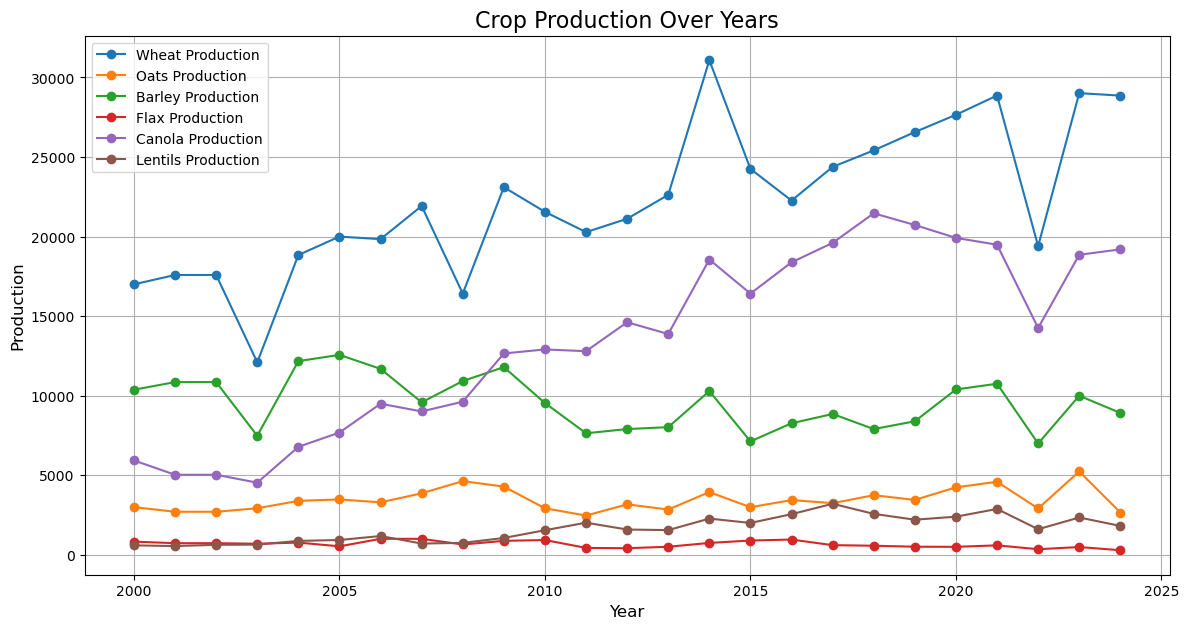

In [19]:
plt.figure(figsize=(14, 7))

# Plotting each crop's production using the index for the x-axis
plt.plot(data.index, data['Wheat_Prod'], label='Wheat Production', marker='o')
plt.plot(data.index, data['Oats_Prod'], label='Oats Production', marker='o')
plt.plot(data.index, data['Barley_Prod'], label='Barley Production', marker='o')
plt.plot(data.index, data['Flax_Prod'], label='Flax Production', marker='o')
plt.plot(data.index, data['Canola_Prod'], label='Canola Production', marker='o')
plt.plot(data.index, data['Lentils_Prod'], label='Lentils Production', marker='o')

# Adding titles and labels
plt.title('Crop Production Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.legend()
plt.grid()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


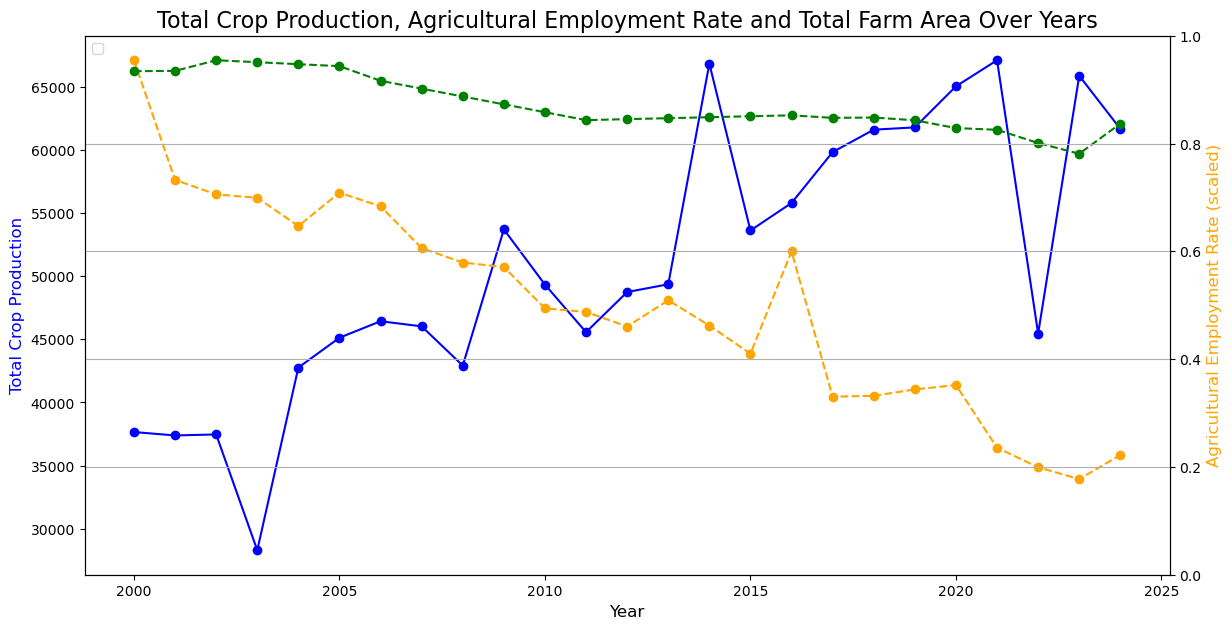

In [20]:
# Calculate the sum of all crop productions
data['Total_Prod'] = data['Wheat_Prod'] + data['Oats_Prod'] + data['Barley_Prod'] + data['Flax_Prod'] + data['Canola_Prod'] + data['Lentils_Prod']

plt.figure(figsize=(14, 7))

# Plotting total crop production using the index for the x-axis
plt.plot(data.index, data['Total_Prod'], marker='o', color='blue', label='Total Crop Production')

# Adding an imaginary axis for employment rate
employment_rate_scaled = data['Agric_Employment_Rate'] * (data['Total_Prod'].max() / data['Agric_Employment_Rate'].max())
plt.plot(data.index, employment_rate_scaled, marker='o', color='orange', linestyle='--', label='Employment Rate (scaled)')

# Optionally, adding farm area with scaling
farm_area_scaled = data['Farm_Area'] * (data['Total_Prod'].max() / data['Farm_Area'].max())
plt.plot(data.index, farm_area_scaled, marker='o', color='green', linestyle='--', label='Farm Area (scaled)')

# Adding titles and labels
plt.title('Total Crop Production, Agricultural Employment Rate and Total Farm Area Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crop Production', fontsize=12, color='blue')

# Create a second y-axis for the employment rate label
ax2 = plt.gca().twinx()  
ax2.set_ylabel('Agricultural Employment Rate (scaled)', fontsize=12, color='orange')

# Adding grid and legend
plt.grid()
plt.legend(loc='upper left')

# Show the plot
plt.show()

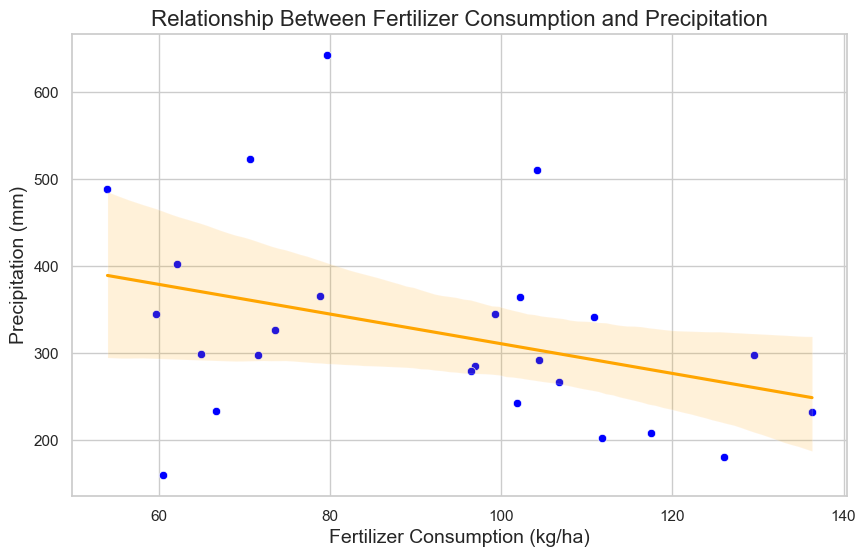

In [21]:
# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=data, x='Fertlizer_Cons', y='Precipitation', color='blue')

# Add a trend line
sns.regplot(data=data, x='Fertlizer_Cons', y='Precipitation', scatter=False, color='orange')

# Set the title and labels
plt.title('Relationship Between Fertilizer Consumption and Precipitation', fontsize=16)
plt.xlabel('Fertilizer Consumption (kg/ha)', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)

# Show the plot
plt.show()

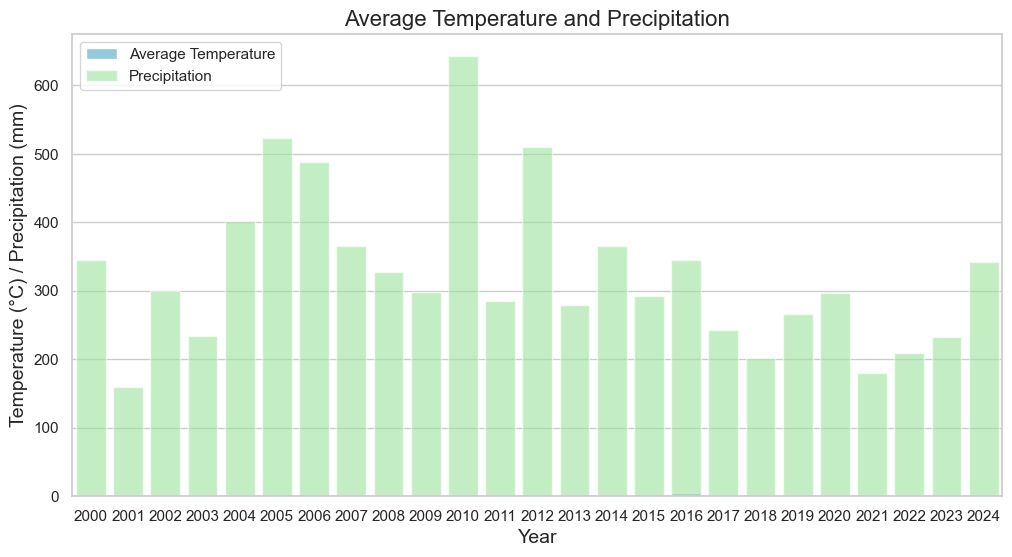

In [22]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for average temperature and precipitation
sns.barplot(data=data, x=data.index, y='Ave_Temp', color='skyblue', ax=ax, label='Average Temperature')
sns.barplot(data=data, x=data.index, y='Precipitation', color='lightgreen', ax=ax, label='Precipitation', alpha=0.6)

# Set titles and labels
ax.set_title('Average Temperature and Precipitation', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature (°C) / Precipitation (mm)', fontsize=14)

# Show legends
ax.legend(loc='upper left')

# Show the plot
plt.show()

$$ MODEL BUILDING   $$

1. LINEAR REGRESSION

   Why Linear Regression?
Simplicity and Interpretability:
Linear regression is straightforward to interpret. It estimates the relationship between the input features and the target variable by fitting a linear equation, making it intuitive to understand how changes in the features affect the target.
Efficiency:
Linear regression is computationally efficient, making it suitable for large datasets. It requires less computational power than more complex models like SVR or neural networks.
Linear Relationships:
If the relationship between the features and the target variable is approximately linear, linear regression can provide good predictive performance.
Baseline Model:
It serves as a good baseline model against which the performance of more complex algorithms can be compared. If the linear model performs well, there may be no need to use more complicated approaches.
Common in Agriculture:
In agricultural contexts, relationships between factors like area, employment, and production are often linear or can be approximated as linear, making linear regression a suitable choice.

Using linear regression in this context allows for a straightforward analysis of how various factors influence crop production. Later, we will explore more complex models like SVR or random forests. This approach ensures that we start with a model that is easy to understand and interpret before moving on to more sophisticated techniques.

In [25]:
def train_crop_model(data, crop_name, features, target, seed_var, price_var):
    # Define features and target variable
    X = data[features + [seed_var, price_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

# Define crops information
crops_info = {
    'Wheat': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Wheat_Prod',
        'seed_var': 'Wheat_Seed',
        'price_var': 'Wheat_Price'
    },
    'Oats': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Oats_Prod',
        'seed_var': 'Oats_Seed',
        'price_var': 'Oats_Price'
    },
    'Barley': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Barley_Prod',
        'seed_var': 'Barley_Seed',
        'price_var': 'Barley_Price'
    },
    'Flax': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Flax_Prod',
        'seed_var': 'Flax_Seed',
        'price_var': 'Flax_Price'
    },
    'Canola': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Canola_Prod',
        'seed_var': 'Canola_Seed',
        'price_var': 'Canola_Price'
    },
    'Lentils': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Lentils_Prod',
        'seed_var': 'Lentils_Seed',
        'price_var': 'Lentils_Price'
    }
}

# Iterate over each crop and train the model
for crop, info in crops_info.items():
    train_crop_model(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'])

Model for Wheat:
Mean Squared Error: 36968230.22269744
R^2 Score: -0.7857490920259824
Mean Absolute Error (MAE): 4769.484515104051
---
Model for Oats:
Mean Squared Error: 557090.5917899926
R^2 Score: 0.47586950855195087
Mean Absolute Error (MAE): 715.7317433630808
---
Model for Barley:
Mean Squared Error: 7308276.389667344
R^2 Score: -3.5674490117239195
Mean Absolute Error (MAE): 2132.7947110232003
---
Model for Flax:
Mean Squared Error: 461343.40596996807
R^2 Score: -10.676084947345231
Mean Absolute Error (MAE): 543.9133055112364
---
Model for Canola:
Mean Squared Error: 7146620.561907354
R^2 Score: 0.7135897804994502
Mean Absolute Error (MAE): 2267.4770481738437
---
Model for Lentils:
Mean Squared Error: 271204.4610941615
R^2 Score: 0.5970370694324089
Mean Absolute Error (MAE): 414.81558108498905
---


In [26]:
data.head()

,Farm_Area,Agric_Employment_Rate,Population,Precipitation,Min_Temp,Max_Temp,Ave_Temp,Fertlizer_Cons,Nonres_Pat_App,Res_Pat_App,...,Flax_Price,Flax_Seed,Flax_Prod,Canola_Price,Canola_Seed,Canola_Prod,Lentils_Price,Lentils_Seed,Lentils_Prod,Total_Prod
Year,,,,,,,,,,,,,,,,,,,,,
2000,612870.000,2.515509,30685730.0,344.6,-36.3,33.8,2.1,59.685851,35435.0,4187.0,...,201.515000,31.038438,813.49607,233.605000,36.698483,5917.291739,363.916667,44.391345,580.177192,37651.007537
2001,613081.608,2.160145,31020855.0,159.7,-35.0,37.7,3.8,60.420900,35753.0,3963.0,...,265.327500,31.241273,715.00000,280.780833,34.798516,5017.100000,301.250000,44.435824,533.463402,37382.563402
2002,620910.000,2.116887,31359199.0,299.3,-34.6,36.5,1.9,64.882359,35782.0,3959.0,...,342.855000,29.600000,715.00000,353.843333,27.900000,5017.100000,356.666667,52.581900,613.145093,37462.245093
2003,619460.000,2.107054,31642461.0,233.8,-38.3,38.6,2.7,66.667693,33299.0,3929.0,...,336.719167,31.700000,679.40000,346.510000,34.100000,4520.500000,452.500000,66.191259,625.478338,28288.178338
2004,618010.000,2.023169,31938807.0,402.6,-44.9,31.6,2.1,62.113345,32970.0,5231.0,...,377.854167,29.700000,754.40000,342.473333,37.600000,6771.200000,426.833333,63.503027,858.966085,42762.466085


In [27]:
# Define features and target variable (excluding 'Year')
X = data[['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind','Canola_Seed', 'Canola_Price']]
y = data['Canola_Prod']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Make predictions for the entire dataset using the already trained model
y_pred_all = model.predict(X)

# Create a DataFrame to hold actual and predicted values
results_df = pd.DataFrame({
    'Actual_Canola_Prod': y,
    'Predicted_Canola_Prod': y_pred_all
}, index=data.index)  # Use the existing index (Year)

# Sort by Year (if needed)
results_df.sort_index(inplace=True)

# Reset index if you want 'Year' as a column
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Year'}, inplace=True)

# Display the results
results_df

,Year,Actual_Canola_Prod,Predicted_Canola_Prod
0,2000,5917.291739,6768.287837
1,2001,5017.100000,5612.091837
2,2002,5017.100000,4401.671991
3,2003,4520.500000,4463.694355
4,2004,6771.200000,6119.878124
5,2005,7673.600000,8838.337165
6,2006,9483.300000,8922.356332
7,2007,9000.300000,9585.919869
8,2008,9611.100000,10018.557248
9,2009,12644.900000,12533.718843


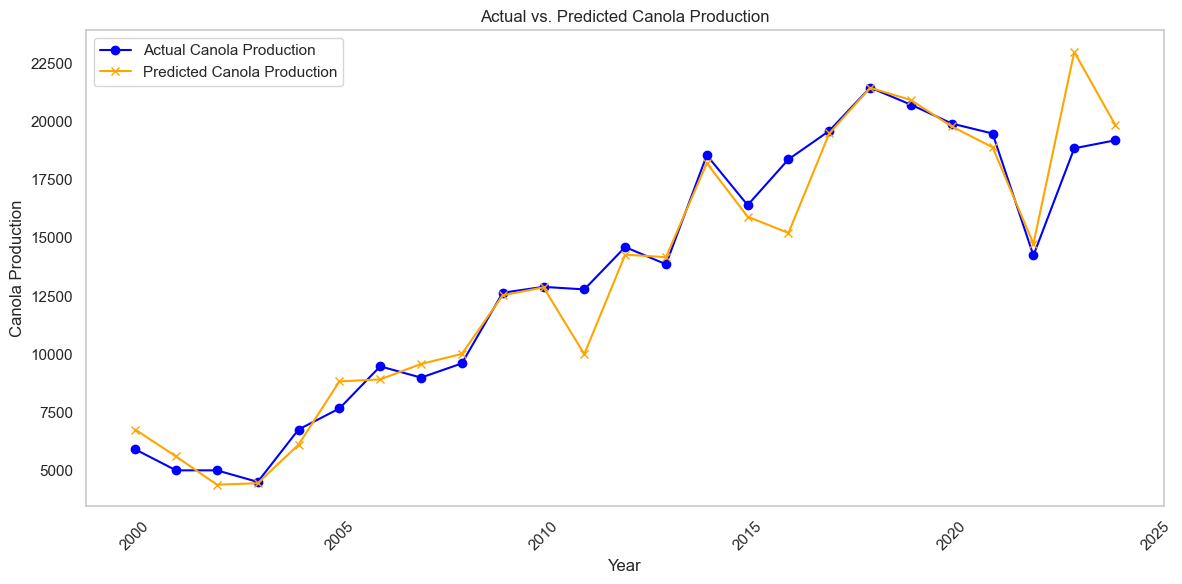

In [28]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(results_df['Year'], results_df['Actual_Canola_Prod'], label='Actual Canola Production', color='blue', marker='o')
plt.plot(results_df['Year'], results_df['Predicted_Canola_Prod'], label='Predicted Canola Production', color='orange', marker='x')

# Add titles and labels
plt.title('Actual vs. Predicted Canola Production')
plt.xlabel('Year')
plt.ylabel('Canola Production')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

$$ Ridge and Lasso Regressions $$


Ridge Regression:

Handling Multicollinearity: Effective for situations where independent variables are highly correlated, stabilizing coefficient estimates.
Regularization: Employs L2 regularization, discouraging large coefficients and helping to prevent overfitting, especially in high-dimensional datasets.
Improved Generalization: Constrains coefficients to enhance the model’s ability to generalize to unseen data, reducing the risk of overfitting.
Preservation of All Features: Retains all features in the model, making it suitable when all predictors are believed to contribute to the outcome.
Tuning with Alpha: The alpha parameter controls the strength of the penalty, allowing for a balance between model complexity and performance.
Conclusion: Ridge regression is a robust technique for linear modeling, particularly beneficial in handling multicollinearity and high-dimensional datasets, while effectively preventing overfitting.

Lasso Regression:

Feature Selection: Shrinks some coefficients to zero, eliminating less important variables and simplifying the model.
Simplicity: Results in simpler models that are easier to interpret and communicate, enhancing robustness.
Handling Multicollinearity: Effective in scenarios with correlated variables, potentially removing some entirely to clarify key features.
Regularization: Uses L1 regularization to promote sparsity, leading to models that are less complex and more generalizable.
Lasso regression is valuable for feature selection, simplicity, and handling multicollinearity, with the ability to fine-tune model performance through the alpha parameter.le for feature selection, simplicity, and handling multicollinearity, with the ability to fine-tune model performance through the alpha parameter.
Tuning with Alpha: The alpha parameter determines the strength of the penalty; setting it to 1.0 applies a moderate level of regularization, balancing model fit and complexity.

Explanation of Alpha=1.0:

Indicates a balanced regularization approach, retaining important predictors while mitigating overfitting. Adjusting alpha can optimize the model for better predictions and interpretability.
ugh the alpha parameter.

In [31]:
def train_crop_model(data, crop_name, features, target, seed_var, price_var, alpha=1.0):
    # Define features and target variable
    X = data[features + [seed_var, price_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (Ridge Regression with alpha {alpha}):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

# Iterate over each crop and train the model with ridge regression
for crop, info in crops_info.items():
    train_crop_model(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'], alpha=1.0)

Model for Wheat (Ridge Regression with alpha 1.0):
Mean Squared Error: 22061732.97271739
R^2 Score: -0.06569125400980913
Mean Absolute Error (MAE): 4134.429524736157
---
Model for Oats (Ridge Regression with alpha 1.0):
Mean Squared Error: 1198309.3384347274
R^2 Score: -0.12741172031378523
Mean Absolute Error (MAE): 931.8454650117061
---
Model for Barley (Ridge Regression with alpha 1.0):
Mean Squared Error: 12612903.156109398
R^2 Score: -6.88267834763206
Mean Absolute Error (MAE): 2944.807943059391
---
Model for Flax (Ridge Regression with alpha 1.0):
Mean Squared Error: 76154.57307029457
R^2 Score: -0.9273869590225641
Mean Absolute Error (MAE): 204.89459486235947
---
Model for Canola (Ridge Regression with alpha 1.0):
Mean Squared Error: 1847924.4498200647
R^2 Score: 0.9259419969608486
Mean Absolute Error (MAE): 1227.0322958152854
---
Model for Lentils (Ridge Regression with alpha 1.0):
Mean Squared Error: 335377.9530096456
R^2 Score: 0.5016863577859632
Mean Absolute Error (MAE): 461

In [32]:
def train_crop_model(data, crop_name, features, target, seed_var, price_var, alpha=1.0):
    # Define features and target variable
    X = data[features + [seed_var, price_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the Lasso regression model
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (Lasso Regression with alpha {alpha}):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

# Iterate over each crop and train the model with Lasso regression
for crop, info in crops_info.items():
    train_crop_model(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'], alpha=1.0)

Model for Wheat (Lasso Regression with alpha 1.0):
Mean Squared Error: 41958016.99120002
R^2 Score: -1.0267805706112343
Mean Absolute Error (MAE): 5235.2449496727995
---
Model for Oats (Lasso Regression with alpha 1.0):
Mean Squared Error: 1181738.4075096513
R^2 Score: -0.11182120362312475
Mean Absolute Error (MAE): 898.9254907621446
---
Model for Barley (Lasso Regression with alpha 1.0):
Mean Squared Error: 3858168.5514005297
R^2 Score: -1.411237232635747
Mean Absolute Error (MAE): 1698.8379980448997
---
Model for Flax (Lasso Regression with alpha 1.0):
Mean Squared Error: 134325.6196510527
R^2 Score: -2.3996310023179888
Mean Absolute Error (MAE): 253.78410012503696
---
Model for Canola (Lasso Regression with alpha 1.0):
Mean Squared Error: 5536990.977082157
R^2 Score: 0.7780978033769548
Mean Absolute Error (MAE): 2021.524846528849
---
Model for Lentils (Lasso Regression with alpha 1.0):
Mean Squared Error: 333171.5469943665
R^2 Score: 0.504964695577133
Mean Absolute Error (MAE): 458.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+06, tolerance: 5.836e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.752e+05, tolerance: 1.207e+03
  model = cd_fast.enet_coordinate_descent(


$$ Random Forest Regressor Model  $$

Random Forest is a popular machine learning model for several reasons:

Robustness to Overfitting:
Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions. This averaging process helps reduce overfitting compared to single decision trees, making it more robust.
Handling Non-linearity:
Random Forest can capture complex relationships in the data without requiring a linear assumption. It can model non-linear patterns effectively, which is particularly useful in agricultural data where relationships may not be straightforward.
Feature Importance:
Random Forest provides insights into feature importance, allowing practitioners to understand which variables contribute most to predictions. This can aid in identifying key factors affecting crop production.
Flexibility with Data Types:
The model can handle both numerical and categorical data, making it versatile for various datasets encountered in agricultural applications.
Tuning and Customization:
The n_estimators parameter allows you to control the number of trees in the forest, which can be tuned to improve model performance. More trees can lead to better accuracy but may also increase computation time.
Good Performance with Default Settings:
Random Forest often performs well with minimal hyperparameter tuning, making it a good starting point for predictive modeling.

In summary, Random Forest is considered a strong option for regression tasks, including crop production modeling, due to its robustness, ability to handle non-linear relationships, feature importance insights, and versatility with different data types. Its ensemble nature helps mitigate overfitting, making it suitable for complex datasets commonly found in agricultural research and applications.

In [35]:
def train_crop_model(data, crop_name, features, target, seed_var, price_var, n_estimators=100, random_state=42):
    # Define features and target variable
    X = data[features + [seed_var, price_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Initialize and fit the Random Forest regression model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (Random Forest with {n_estimators} trees):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

# Iterate over each crop and train the model with Random Forest regression
for crop, info in crops_info.items():
    train_crop_model(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'], n_estimators=100)

Model for Wheat (Random Forest with 100 trees):
Mean Squared Error: 12230457.680106672
R^2 Score: 0.4092081615553447
Mean Absolute Error (MAE): 3209.9582819151483
---
Model for Oats (Random Forest with 100 trees):
Mean Squared Error: 898341.3380847154
R^2 Score: 0.1548087618827776
Mean Absolute Error (MAE): 800.7514299759597
---
Model for Barley (Random Forest with 100 trees):
Mean Squared Error: 1588038.0255017611
R^2 Score: 0.007524849441527981
Mean Absolute Error (MAE): 1039.9545807053314
---
Model for Flax (Random Forest with 100 trees):
Mean Squared Error: 20863.991823890563
R^2 Score: 0.4719557324889547
Mean Absolute Error (MAE): 125.40921393987492
---
Model for Canola (Random Forest with 100 trees):
Mean Squared Error: 2487740.79885397
R^2 Score: 0.9003005151752346
Mean Absolute Error (MAE): 1333.050252249113
---
Model for Lentils (Random Forest with 100 trees):
Mean Squared Error: 154270.27374875528
R^2 Score: 0.7707810507302851
Mean Absolute Error (MAE): 322.72717178136133
---

$$ SVR  $$

Why SVR is also Considered:

Robustness to Outliers: SVR uses an epsilon-insensitive loss function, making it less sensitive to outliers and more focused on relevant data points.
Effective in High Dimensions: It performs well in high-dimensional datasets, where the number of features exceeds the number of observations.
Flexibility with Kernels: SVR can capture complex, non-linear relationships through different kernel functions, allowing for customization based on data characteristics.
Generalization: The model aims to balance training error and complexity, ensuring good performance on unseen data.
Control Over Complexity: SVR provides parameters to manage the trade-off between fitting the data closely and maintaining simplicity.

Kernel Functions in SVR:

Linear Kernel: Captures linear relationships, suitable for linearly separable data.
Polynomial Kernel: Models polynomial relationships by introducing polynomial terms, useful for more complex interactions.
Radial Basis Function (RBF) Kernel: Handles non-linear relationships effectively by measuring distance in an infinite-dimensional space.


In this project, we experiment with all three kernel types—linear, polynomial, and RBF—to identify which best captures the relationships in the crop production data, enhancing the model's predictive performance.

In [38]:
def train_crop_model_svr(data, crop_name, features, target, seed_var, price_var):
    # Define features and target variable
    X = data[features + [seed_var, price_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # Initialize and fit the SVR model
    model = SVR(kernel='linear')  # You can change the kernel if needed
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform the predictions to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (SVR):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

# Define crops information for your specific crops
crops_info = {
    'Wheat': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Wheat_Prod',
        'seed_var': 'Wheat_Seed',
        'price_var': 'Wheat_Price'
    },
    'Oats': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Oats_Prod',
        'seed_var': 'Oats_Seed',
        'price_var': 'Oats_Price'
    },
    'Barley': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Barley_Prod',
        'seed_var': 'Barley_Seed',
        'price_var': 'Barley_Price'
    },
    'Flax': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Flax_Prod',
        'seed_var': 'Flax_Seed',
        'price_var': 'Flax_Price'
    },
    'Canola': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Canola_Prod',
        'seed_var': 'Canola_Seed',
        'price_var': 'Canola_Price'
    },
    'Lentils': {
        'features': ['Farm_Area', 'Agric_Employment_Rate', 'Population', 'Precipitation',
                     'Min_Temp', 'Max_Temp', 'Ave_Temp', 'Fertlizer_Cons',
                     'Nonres_Pat_App', 'Res_Pat_App', 'Veg_Greeness_Rate', 'Green_Ind'],
        'target': 'Lentils_Prod',
        'seed_var': 'Lentils_Seed',
        'price_var': 'Lentils_Price'
    }
}

# Iterate over each crop and train the model using SVR
for crop, info in crops_info.items():
    train_crop_model_svr(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'])

Model for Wheat (SVR):
Mean Squared Error: 5533221.454999709
R^2 Score: 0.73271792753612
Mean Absolute Error (MAE): 1541.7499107564631
---
Model for Oats (SVR):
Mean Squared Error: 1237766.9231386236
R^2 Score: -0.1645348086713827
Mean Absolute Error (MAE): 967.1370102011224
---
Model for Barley (SVR):
Mean Squared Error: 3238372.5855646385
R^2 Score: -1.0238837281035424
Mean Absolute Error (MAE): 1415.120758195429
---
Model for Flax (SVR):
Mean Squared Error: 122396.5812906947
R^2 Score: -2.097720400728623
Mean Absolute Error (MAE): 255.23291793543552
---
Model for Canola (SVR):
Mean Squared Error: 7688673.443691373
R^2 Score: 0.6918662982594428
Mean Absolute Error (MAE): 2119.341398213229
---
Model for Lentils (SVR):
Mean Squared Error: 155616.7463284275
R^2 Score: 0.7687804253185768
Mean Absolute Error (MAE): 359.17395173552154
---


In [78]:
def train_crop_model_svr(data, crop_name, features, target, seed_var, price_var):
    # Define features and target variable
    X = data[features + [seed_var, price_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # Initialize and fit the SVR model
    model = SVR(kernel='poly') 
    model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform the predictions to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Model for {crop_name} (SVR):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')

# Iterate over each crop and train the model using SVR
for crop, info in crops_info.items():
    train_crop_model_svr(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'])

Model for Wheat (SVR):
Mean Squared Error: 47660486.52030362
R^2 Score: -2.1195186200661897
Mean Absolute Error (MAE): 4558.559915485396
---
Model for Oats (SVR):
Mean Squared Error: 451294.90845468256
R^2 Score: 0.5037179219414072
Mean Absolute Error (MAE): 554.1129401253518
---
Model for Barley (SVR):
Mean Squared Error: 3168149.0214849603
R^2 Score: -0.5019888436581306
Mean Absolute Error (MAE): 1639.7850334482823
---
Model for Flax (SVR):
Mean Squared Error: 44839.463648446916
R^2 Score: -0.3341014787643264
Mean Absolute Error (MAE): 168.68485365278877
---
Model for Canola (SVR):
Mean Squared Error: 118124490.41488107
R^2 Score: -4.151763633739801
Mean Absolute Error (MAE): 5800.099373159669
---
Model for Lentils (SVR):
Mean Squared Error: 1605531.1084235115
R^2 Score: -1.826526978544261
Mean Absolute Error (MAE): 730.142417681786
---


In [40]:
def train_crop_model_svr(data, crop_name, features, target, seed_var, price_var):
    # Define features and target variable
    X = data[features + [price_var, seed_var]]
    y = data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # Initialize and fit the SVR model
    svm_model = SVR(kernel='rbf')  # You can try other kernels like 'linear', 'poly', etc.
    svm_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = svm_model.predict(X_test_scaled)

    # Inverse transform the predictions to original scale
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print evaluation results
    print(f'Model for {crop_name} (SVR):')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score (analogous to accuracy): {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('---')


# Iterate over each crop and train the model using SVR
for crop, info in crops_info.items():
    train_crop_model_svr(data, crop, info['features'], info['target'], info['seed_var'], info['price_var'])

Model for Wheat (SVR):
Mean Squared Error: 11438479.869975531
R^2 Score (analogous to accuracy): 0.25131794606334956
Mean Absolute Error (MAE): 2724.67332694297
---
Model for Oats (SVR):
Mean Squared Error: 935712.6532997094
R^2 Score (analogous to accuracy): -0.028988830464349302
Mean Absolute Error (MAE): 803.8663024682853
---
Model for Barley (SVR):
Mean Squared Error: 831279.4993752587
R^2 Score (analogous to accuracy): 0.6058984203217407
Mean Absolute Error (MAE): 753.7159128359497
---
Model for Flax (SVR):
Mean Squared Error: 28432.880704691714
R^2 Score (analogous to accuracy): 0.15404099185801157
Mean Absolute Error (MAE): 150.12234557637055
---
Model for Canola (SVR):
Mean Squared Error: 8112123.073987953
R^2 Score (analogous to accuracy): 0.6462059603541127
Mean Absolute Error (MAE): 2525.6340124162543
---
Model for Lentils (SVR):
Mean Squared Error: 248127.37435164535
R^2 Score (analogous to accuracy): 0.5631733860274255
Mean Absolute Error (MAE): 480.56167347324345
---
